#Импортируем все необходимые для работы библиотеки 

In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense

from sklearn.metrics import classification_report, mean_squared_error
from sklearn.impute import KNNImputer

# Datasets

In [286]:
frac_df =  pd.read_csv(
    './Data_lab_1/frac.csv', 
    sep=";"
)
result_slice_df = pd.read_csv(
    './Data_lab_1/result_slice.csv',
    encoding = "windows-1251", 
    sep=";"
)

In [280]:
display(frac_df)
display(frac_df.shape)
display(frac_df.info())
display(frac_df.describe())

,well_index,well_cluster_index,date_fracturing,date_begin,year,wellbore_type,well_type,well_character,uchastok_gpa,uchastok_monit,...,stratum_list_perf_nagn1,receptivity_avg_nagn1,receptivity_sum_nagn1,azimuth_stress_nagn1,bottomhole_pressure_nagn1,h_nagn1,h_perf_nagn1,porosity_perf_nagn1,dist_flood_nagn1,result_qoil3
0,1052F,0,09.11.21,24.11.21,2021,NNS,deyst,Neftyanaya,A,A-2,...,NaN,"0,0589331004822001","0,100836187783021","0,0271321810615717","0,890154454972665","0,0691471436238595","0,101043262566572","0,815130970724192","0,637183827209803","0,02"
1,449,99,16.11.12,28.11.12,2012,NNS,deyst,Neftyanaya,B,B-7,...,"plX-1,plX-2","0,343658047751155","0,513470636142953","0,527776838191663",NaN,"0,476516182179009","0,420642737287517","0,834360554699539","0,679070424683053","0,14"
2,449,99,23.05.16,28.05.16,2016,NNS,deyst,Neftyanaya,B,B-7,...,"plX-1,plX-2","0,327586534939656","0,58892079123965","0,527258421662559",NaN,"0,476516182179009","0,420642737287517","0,834360554699539","0,665567047687821","0,01"
3,449,99,08.10.94,06.10.94,1994,NNS,deyst,Neftyanaya,B,B-7,...,"plX-1,plX-2","0,234812128491888","0,212313869174507","0,527776838191663",NaN,"0,476516182179009","0,420642737287517","0,834360554699539","0,74700638094068","0,05"
4,453,99,02.07.10,11.07.10,2010,NNS,bd,Neftyanaya,B,B-7,...,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,"0,11"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469,1067C,42B,05.11.13,11.11.13,2013,NNS,bd,Neftyanaya,D,D-10,...,"plX-1,plX-6","0,0584346617927321","0,0159254300079734","0,0127843557084446","0,414751260117184","0,199603090403026","0,291675786094696","0,80431432973806","0,754131820936258","0,13"
1470,308,42B,27.08.12,11.09.12,2012,NNS,bd,Neftyanaya,D,D-10,...,plX-1,"0,125978669414552","0,152512737386027","0,751492126241489",NaN,"0,1897802019496","0,163383672576056","0,769645608628661","0,558010346254466","0,10"
1471,312,42B,17.12.12,29.12.12,2012,NNS,bd,Neftyanaya,D,D-10,...,"plX-1,plX-2,plX-6","0,0773222819826392","0,00200912503639957","0,722407295091014","0,369719661239563","0,303985321833772","0,2999379878894","0,774268104776581",1,"0,02"
1472,313,42B,11.09.14,22.09.14,2014,NNS,deyst,Neftyanaya,D,D-11,...,"plX-1,plX-2,plX-6","0,17556396340943","0,019848696090012","0,789390038390082","0,369719661239563","0,303985321833772","0,2999379878894","0,774268104776581","0,66664700403549","0,05"


(1474, 103)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474 entries, 0 to 1473
Columns: 103 entries, well_index to result_qoil3
dtypes: float64(1), int64(6), object(96)
memory usage: 1.2+ MB


None

,year,kratnost,number_of_permeable_intervals,cnt_1000,cnt_nagn_1000,nagn_all_1000,oil_all_1000
count,1474.000000,1472.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000
mean,2006.527815,1.559103,6.812076,6.989824,2.807327,2.807327,6.989824
std,8.129358,0.697114,4.356869,4.647730,1.878756,1.878756,4.647730
min,1990.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2000.000000,1.000000,4.000000,3.000000,1.000000,1.000000,3.000000
50%,2006.000000,1.000000,6.000000,6.000000,3.000000,3.000000,6.000000
75%,2013.000000,2.000000,9.000000,10.000000,4.000000,4.000000,10.000000
max,2021.000000,5.000000,38.000000,26.000000,10.000000,10.000000,26.000000


# Регрессия

## Подготовка датасета

In [246]:
def toNum(s):
  try:
    return float(s.replace(',','.'))
  except:
    return s
    

In [247]:
for col in frac_df.columns:
  frac_df[col]= frac_df[col].apply(toNum)
  

In [248]:
col_num = 0
k_miss = .5

half_cols = []

for half_miss in ((frac_df.isnull().sum() / frac_df.shape[0]) > k_miss):
    if half_miss:
        half_cols.append(frac_df.columns.tolist()[col_num])

    col_num += 1

half_cols

['repair_type',
 'bottomhole_pressure6',
 'kprod_current',
 'mrp',
 'pipe_size',
 'bottomhole_pressure_nagn1']

In [249]:
frac_df = frac_df.drop(
    columns = half_cols
)

In [250]:
col_num = 0
obj_cols = []

for is_obj in frac_df.dtypes == np.object_:
    if is_obj:
        obj_cols.append(frac_df.columns.tolist()[col_num])

    col_num += 1

obj_cols

['well_index',
 'well_cluster_index',
 'date_fracturing',
 'date_begin',
 'wellbore_type',
 'well_type',
 'well_character',
 'uchastok_gpa',
 'uchastok_monit',
 'stratum_list',
 'stratum_list_perf',
 'expl_method',
 'stratum_list_dob',
 'stratum_list_nagn1',
 'stratum_list_perf_nagn1']

In [251]:
frac_df = frac_df.drop(
    columns = obj_cols
)

In [252]:
frac_df = frac_df.fillna(method = 'ffill', axis = 0)
frac_df = frac_df.dropna(axis = 0)    
https://github.com/NELopatin-dev
frac_df

,year,kratnost,perforation_roof,perforation_bottom,h,h_perf,hoil,hoil_perf,porosity,permeability_min,...,dynamic_level_dob,dist_nagn1,receptivity_avg_nagn1,receptivity_sum_nagn1,azimuth_stress_nagn1,h_nagn1,h_perf_nagn1,porosity_perf_nagn1,dist_flood_nagn1,result_qoil3
0,2021,2.0,2863.8,2891.5,0.132469,0.133819,0.132469,0.133819,0.365891,0.022173,...,0.839734,0.544285,0.058933,0.100836,0.027132,0.069147,0.101043,0.815131,0.637184,0.02
1,2012,2.0,2993.8,3019.0,0.510174,0.515374,0.510174,0.515374,0.496893,0.009718,...,0.626427,0.658348,0.343658,0.513471,0.527777,0.476516,0.420643,0.834361,0.679070,0.14
2,2016,3.0,3029.3,3051.4,0.589850,0.595863,0.589850,0.595863,0.339451,0.005891,...,0.000000,0.658348,0.327587,0.588921,0.527258,0.476516,0.420643,0.834361,0.665567,0.01
3,1994,1.0,3001.0,3020.0,0.510174,0.515374,0.510174,0.515374,0.496893,0.009718,...,0.000000,0.658348,0.234812,0.212314,0.527777,0.476516,0.420643,0.834361,0.747006,0.05
4,2010,2.0,2935.0,2963.0,0.362182,0.332447,0.224391,0.226678,0.496893,0.009718,...,0.000000,0.658348,0.234812,0.212314,0.527777,0.000000,0.000000,0.000000,0.747006,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469,2013,1.0,2804.5,2842.0,0.180732,0.182574,0.180732,0.182574,0.473898,0.008291,...,0.784851,0.512579,0.058435,0.015925,0.012784,0.199603,0.291676,0.804314,0.754132,0.13
1470,2012,1.0,2927.0,2936.4,0.106727,0.107815,0.106727,0.107815,0.432948,0.030327,...,0.000000,0.387265,0.125979,0.152513,0.751492,0.189780,0.163384,0.769646,0.558010,0.10
1471,2012,1.0,2863.6,2888.8,0.191228,0.100448,0.191228,0.100448,0.210610,0.007927,...,0.000000,0.943482,0.077322,0.002009,0.722407,0.303985,0.299938,0.774268,1.000000,0.02
1472,2014,2.0,3016.4,3047.7,0.249194,0.251735,0.249194,0.251735,0.326101,0.012800,...,0.912004,0.350667,0.175564,0.019849,0.789390,0.303985,0.299938,0.774268,0.666647,0.05


## Опыты

In [253]:
X = frac_df.drop(['result_qoil3', 'year'], axis=1)
y = frac_df['result_qoil3']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size = 0.2, 
    random_state = 15
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train,
    y_train,
    test_size = 0.2,
    random_state = 15,
)

print(
    f'X_train: {X_train.shape}',
    f'X_val: {X_val.shape}',
    sep='\n'
)

X_train: (943, 80)
X_val: (236, 80)


In [254]:
mse_results = []

### Опыт №1

In [255]:
# --------------------------------------------------------------------------------------
# Место где мы играемся с параметрами 
# --------------------------------------------------------------------------------------
regres_model = Sequential()

regres_model.add(Dense(120, activation='relu', input_dim = X_train.shape[1]))
regres_model.add(Dense(60, activation='relu', input_dim = X_train.shape[1]))
regres_model.add(Dense(1))

regres_model.compile(optimizer='adam', loss='mse', metrics='mae')

batch_size = 10
epochs = 105
# --------------------------------------------------------------------------------------
# Место где мы играемся с параметрами 
# --------------------------------------------------------------------------------------
regres_model_hist = regres_model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_val, y_val)
)

Epoch 1/105
95/95 [==============================] - 1s 4ms/step - loss: 353.3288 - mae: 10.2512 - val_loss: 1.4898 - val_mae: 1.1403
Epoch 2/105
95/95 [==============================] - 0s 2ms/step - loss: 0.4607 - mae: 0.5339 - val_loss: 0.1917 - val_mae: 0.3200
Epoch 3/105
95/95 [==============================] - 0s 2ms/step - loss: 0.2360 - mae: 0.3739 - val_loss: 0.2269 - val_mae: 0.4082
Epoch 4/105
95/95 [==============================] - 0s 2ms/step - loss: 0.3422 - mae: 0.4749 - val_loss: 1.2818 - val_mae: 1.0933
Epoch 5/105
95/95 [==============================] - 0s 2ms/step - loss: 0.3084 - mae: 0.4548 - val_loss: 0.1320 - val_mae: 0.2895
Epoch 6/105
95/95 [==============================] - 0s 2ms/step - loss: 0.2398 - mae: 0.3811 - val_loss: 0.0731 - val_mae: 0.2099
Epoch 7/105
95/95 [==============================] - 0s 2ms/step - loss: 0.1043 - mae: 0.2571 - val_loss: 0.0426 - val_mae: 0.1585
Epoch 8/105
95/95 [==============================] - 0s 2ms/step - loss: 0.0686 

In [256]:
y_pred = regres_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mse_results.append(mse)

print("MSE: %f" % (mse))

10/10 [==============================] - 0s 1ms/step
MSE: 18.041829


In [257]:
result_df = pd.DataFrame() 
result_df['Test'] = y_test
result_df['Pred'] = y_pred

result_df

,Test,Pred
770,0.09,-4.023533
637,0.18,-3.993748
432,0.05,-4.261210
1029,0.05,-4.103144
793,0.03,-4.452275
...,...,...
1019,0.19,-4.119053
1032,0.49,-3.919371
488,0.02,-3.988333
83,0.33,-3.930915


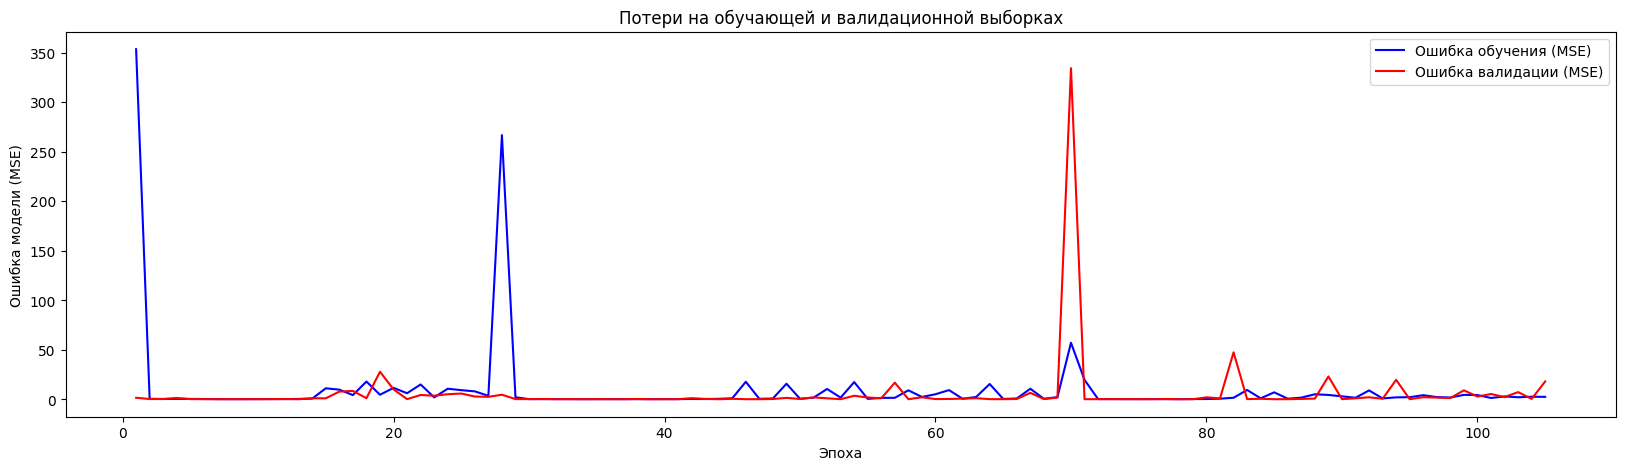

In [258]:
loss_function = regres_model_hist.history['loss']
val_loss_function = regres_model_hist.history['val_loss']

epoch = range(1,epochs+1)

plt.figure(figsize=(20,5))
plt.title('Потери на обучающей и валидационной выборках')
plt.plot(epoch,loss_function,color='blue',label='Ошибка обучения (MSE)')
plt.plot(epoch,val_loss_function,color='red',label='Ошибка валидации (MSE)')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка модели (MSE)')
plt.legend()
plt.show()

### Опыт №2

In [259]:
# --------------------------------------------------------------------------------------
# Место где мы играемся с параметрами 
# --------------------------------------------------------------------------------------
regres_model = Sequential()

regres_model.add(Dense(120, activation='relu', input_dim = X_train.shape[1]))
regres_model.add(Dense(60, activation='relu', input_dim = X_train.shape[1]))
regres_model.add(Dense(1))

regres_model.compile(optimizer='adam', loss='mse', metrics='mae')

batch_size = 10
epochs = 200
# --------------------------------------------------------------------------------------
# Место где мы играемся с параметрами 
# --------------------------------------------------------------------------------------
regres_model_hist = regres_model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_val, y_val)
)

Epoch 1/200
95/95 [==============================] - 1s 4ms/step - loss: 677.4777 - mae: 14.2073 - val_loss: 1.1264 - val_mae: 0.8417
Epoch 2/200
95/95 [==============================] - 0s 2ms/step - loss: 0.9284 - mae: 0.7519 - val_loss: 0.6665 - val_mae: 0.5799
Epoch 3/200
95/95 [==============================] - 0s 2ms/step - loss: 0.8283 - mae: 0.7029 - val_loss: 0.5116 - val_mae: 0.5209
Epoch 4/200
95/95 [==============================] - 0s 2ms/step - loss: 0.8894 - mae: 0.7580 - val_loss: 6.7417 - val_mae: 2.5206
Epoch 5/200
95/95 [==============================] - 0s 2ms/step - loss: 1.1115 - mae: 0.7974 - val_loss: 0.4764 - val_mae: 0.5633
Epoch 6/200
95/95 [==============================] - 0s 2ms/step - loss: 0.5996 - mae: 0.6287 - val_loss: 0.2265 - val_mae: 0.3611
Epoch 7/200
95/95 [==============================] - 0s 2ms/step - loss: 0.4754 - mae: 0.5605 - val_loss: 0.1419 - val_mae: 0.2726
Epoch 8/200
95/95 [==============================] - 0s 2ms/step - loss: 0.3525 

In [260]:
y_pred = regres_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mse_results.append(mse)

print("MSE: %f" % (mse))

10/10 [==============================] - 0s 2ms/step
MSE: 0.397696


In [261]:
result_df = pd.DataFrame() 
result_df['Test'] = y_test
result_df['Pred'] = y_pred

result_df

,Test,Pred
770,0.09,-0.600935
637,0.18,-0.489736
432,0.05,-0.460617
1029,0.05,-0.482147
793,0.03,-0.715553
...,...,...
1019,0.19,-0.447948
1032,0.49,-0.312259
488,0.02,-0.686775
83,0.33,-0.337805


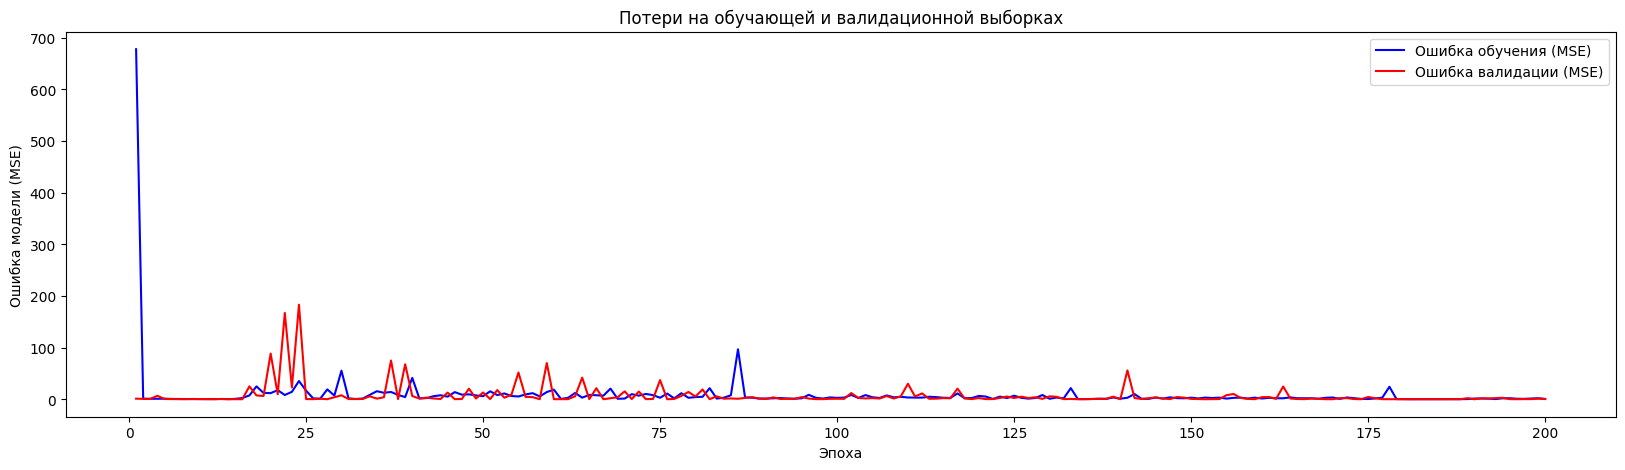

In [262]:
loss_function = regres_model_hist.history['loss']
val_loss_function = regres_model_hist.history['val_loss']

epoch = range(1,epochs+1)

plt.figure(figsize=(20,5))
plt.title('Потери на обучающей и валидационной выборках')
plt.plot(epoch,loss_function,color='blue',label='Ошибка обучения (MSE)')
plt.plot(epoch,val_loss_function,color='red',label='Ошибка валидации (MSE)')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка модели (MSE)')
plt.legend()
plt.show()

### Опыт №3

In [263]:
# --------------------------------------------------------------------------------------
# Место где мы играемся с параметрами 
# --------------------------------------------------------------------------------------
regres_model = Sequential()

regres_model.add(Dense(60, activation='relu', input_dim = X_train.shape[1]))
regres_model.add(Dense(30, activation='relu', input_dim = X_train.shape[1]))
regres_model.add(Dense(1))

regres_model.compile(optimizer='adam', loss='mse', metrics='mae')

batch_size = 10
epochs = 200
# --------------------------------------------------------------------------------------
# Место где мы играемся с параметрами 
# --------------------------------------------------------------------------------------
regres_model_hist = regres_model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_val, y_val)
)

Epoch 1/200
95/95 [==============================] - 1s 4ms/step - loss: 1763.7035 - mae: 22.5718 - val_loss: 2.7883 - val_mae: 1.3007
Epoch 2/200
95/95 [==============================] - 0s 2ms/step - loss: 3.8682 - mae: 1.5120 - val_loss: 2.6828 - val_mae: 1.3097
Epoch 3/200
95/95 [==============================] - 0s 2ms/step - loss: 3.4687 - mae: 1.4128 - val_loss: 2.4943 - val_mae: 1.2024
Epoch 4/200
95/95 [==============================] - 0s 2ms/step - loss: 3.1919 - mae: 1.3384 - val_loss: 2.4168 - val_mae: 1.1461
Epoch 5/200
95/95 [==============================] - 0s 2ms/step - loss: 3.7529 - mae: 1.5110 - val_loss: 5.1855 - val_mae: 1.7949
Epoch 6/200
95/95 [==============================] - 0s 2ms/step - loss: 2.8128 - mae: 1.2747 - val_loss: 1.9721 - val_mae: 1.0709
Epoch 7/200
95/95 [==============================] - 0s 3ms/step - loss: 2.6380 - mae: 1.2238 - val_loss: 2.4772 - val_mae: 1.1436
Epoch 8/200
95/95 [==============================] - 0s 2ms/step - loss: 2.2612

In [264]:
y_pred = regres_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mse_results.append(mse)

print("MSE: %f" % (mse))

10/10 [==============================] - 0s 1ms/step
MSE: 4.847900


In [265]:
result_df = pd.DataFrame() 
result_df['Test'] = y_test
result_df['Pred'] = y_pred

result_df

,Test,Pred
770,0.09,2.170305
637,0.18,2.245820
432,0.05,2.468705
1029,0.05,2.266786
793,0.03,2.266221
...,...,...
1019,0.19,2.374101
1032,0.49,2.618364
488,0.02,1.919450
83,0.33,2.406495


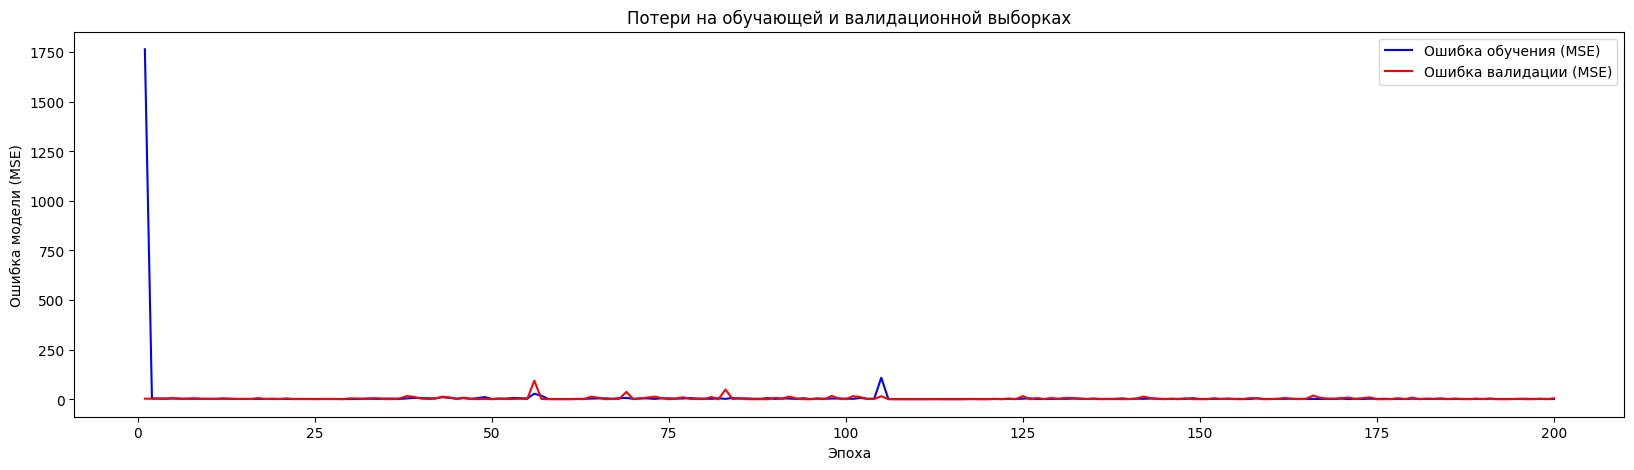

In [266]:
loss_function = regres_model_hist.history['loss']
val_loss_function = regres_model_hist.history['val_loss']

epoch = range(1,epochs+1)

plt.figure(figsize=(20,5))
plt.title('Потери на обучающей и валидационной выборках')
plt.plot(epoch,loss_function,color='blue',label='Ошибка обучения (MSE)')
plt.plot(epoch,val_loss_function,color='red',label='Ошибка валидации (MSE)')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка модели (MSE)')
plt.legend()
plt.show()

### Опыт №4

In [267]:
# --------------------------------------------------------------------------------------
# Место где мы играемся с параметрами 
# --------------------------------------------------------------------------------------
regres_model = Sequential()

regres_model.add(Dense(60, activation='relu', input_dim = X_train.shape[1]))
regres_model.add(Dense(60, activation='relu', input_dim = X_train.shape[1]))
regres_model.add(Dense(1))

regres_model.compile(optimizer='adam', loss='mse', metrics='mae')

batch_size = 5
epochs = 200
# --------------------------------------------------------------------------------------
# Место где мы играемся с параметрами 
# --------------------------------------------------------------------------------------
regres_model_hist = regres_model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_val, y_val)
)

Epoch 1/200
189/189 [==============================] - 1s 3ms/step - loss: 825.4583 - mae: 10.7444 - val_loss: 0.7306 - val_mae: 0.6379
Epoch 2/200
189/189 [==============================] - 0s 2ms/step - loss: 0.9497 - mae: 0.7364 - val_loss: 0.7762 - val_mae: 0.6404
Epoch 3/200
189/189 [==============================] - 0s 2ms/step - loss: 1.0764 - mae: 0.7892 - val_loss: 0.8374 - val_mae: 0.6636
Epoch 4/200
189/189 [==============================] - 0s 2ms/step - loss: 0.9042 - mae: 0.7156 - val_loss: 1.7122 - val_mae: 1.0918
Epoch 5/200
189/189 [==============================] - 0s 2ms/step - loss: 0.8339 - mae: 0.6886 - val_loss: 0.4879 - val_mae: 0.5112
Epoch 6/200
189/189 [==============================] - 0s 2ms/step - loss: 0.8372 - mae: 0.7111 - val_loss: 0.4142 - val_mae: 0.4818
Epoch 7/200
189/189 [==============================] - 0s 2ms/step - loss: 0.6985 - mae: 0.6408 - val_loss: 0.4052 - val_mae: 0.4568
Epoch 8/200
189/189 [==============================] - 0s 2ms/step

In [268]:
y_pred = regres_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mse_results.append(mse)

print("MSE: %f" % (mse))

10/10 [==============================] - 0s 2ms/step
MSE: 0.007603


In [269]:
result_df = pd.DataFrame() 
result_df['Test'] = y_test
result_df['Pred'] = y_pred

result_df

,Test,Pred
770,0.09,0.108911
637,0.18,0.123702
432,0.05,0.099046
1029,0.05,0.097248
793,0.03,0.015727
...,...,...
1019,0.19,0.136721
1032,0.49,0.337022
488,0.02,0.044747
83,0.33,0.216188


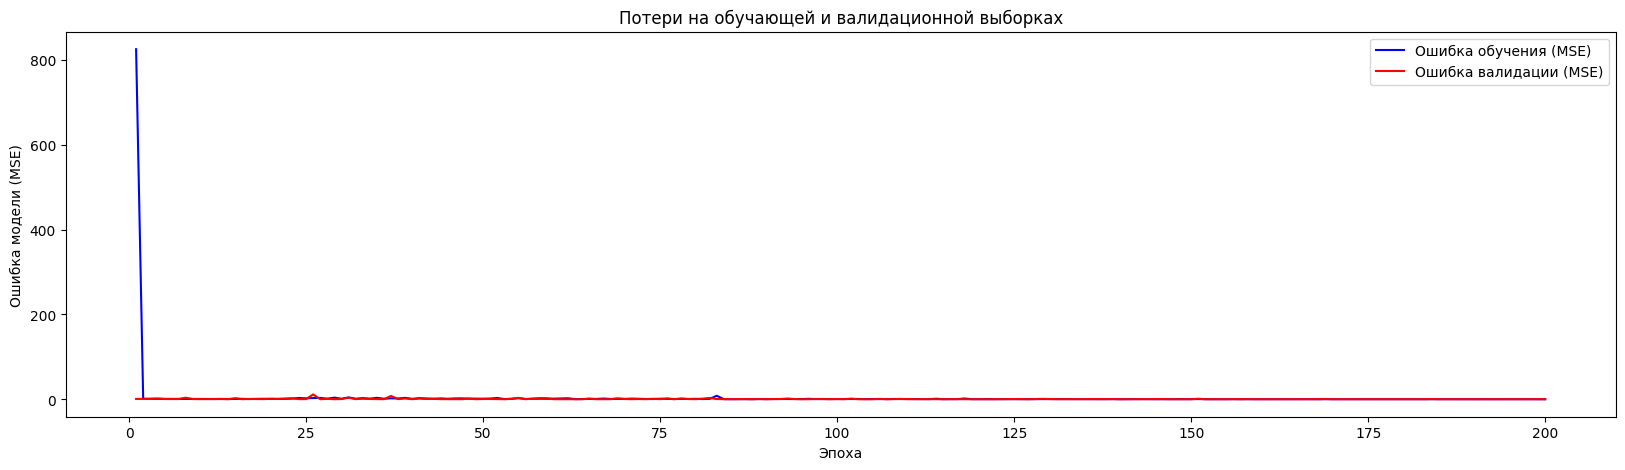

In [270]:
loss_function = regres_model_hist.history['loss']
val_loss_function = regres_model_hist.history['val_loss']

epoch = range(1,epochs+1)

plt.figure(figsize=(20,5))
plt.title('Потери на обучающей и валидационной выборках')
plt.plot(epoch,loss_function,color='blue',label='Ошибка обучения (MSE)')
plt.plot(epoch,val_loss_function,color='red',label='Ошибка валидации (MSE)')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка модели (MSE)')
plt.legend()
plt.show()

### Опыт №5

In [271]:
# --------------------------------------------------------------------------------------
# Место где мы играемся с параметрами 
# --------------------------------------------------------------------------------------
regres_model = Sequential()

regres_model.add(Dense(120, activation='relu', input_dim = X_train.shape[1]))
regres_model.add(Dense(60, activation='relu'))
regres_model.add(Dense(30, activation='relu'))
regres_model.add(Dense(1))
regres_model.compile(optimizer='adam', loss='mse', metrics='mae')

batch_size = 10
epochs = 50
# --------------------------------------------------------------------------------------
# Место где мы играемся с параметрами 
# --------------------------------------------------------------------------------------
regres_model_hist = regres_model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_val, y_val)
)

Epoch 1/50
95/95 [==============================] - 2s 7ms/step - loss: 5646.8296 - mae: 32.2707 - val_loss: 0.1468 - val_mae: 0.2879
Epoch 2/50
95/95 [==============================] - 0s 3ms/step - loss: 0.2139 - mae: 0.3522 - val_loss: 0.1149 - val_mae: 0.2792
Epoch 3/50
95/95 [==============================] - 0s 4ms/step - loss: 0.1329 - mae: 0.2871 - val_loss: 0.1278 - val_mae: 0.2684
Epoch 4/50
95/95 [==============================] - 0s 3ms/step - loss: 0.1399 - mae: 0.2953 - val_loss: 0.0978 - val_mae: 0.2546
Epoch 5/50
95/95 [==============================] - 0s 4ms/step - loss: 0.1331 - mae: 0.2865 - val_loss: 0.0921 - val_mae: 0.2323
Epoch 6/50
95/95 [==============================] - 0s 5ms/step - loss: 0.1197 - mae: 0.2680 - val_loss: 0.1639 - val_mae: 0.3538
Epoch 7/50
95/95 [==============================] - 1s 7ms/step - loss: 0.1185 - mae: 0.2742 - val_loss: 0.0843 - val_mae: 0.2179
Epoch 8/50
95/95 [==============================] - 1s 6ms/step - loss: 0.1032 - mae: 

In [272]:
y_pred = regres_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mse_results.append(mse)

print("MSE: %f" % (mse))

10/10 [==============================] - 0s 1ms/step
MSE: 0.255716


In [273]:
result_df = pd.DataFrame() 
result_df['Test'] = y_test
result_df['Pred'] = y_pred

result_df

,Test,Pred
770,0.09,0.502233
637,0.18,0.565614
432,0.05,0.680116
1029,0.05,0.558900
793,0.03,0.549585
...,...,...
1019,0.19,0.539766
1032,0.49,0.734872
488,0.02,0.520131
83,0.33,0.625696


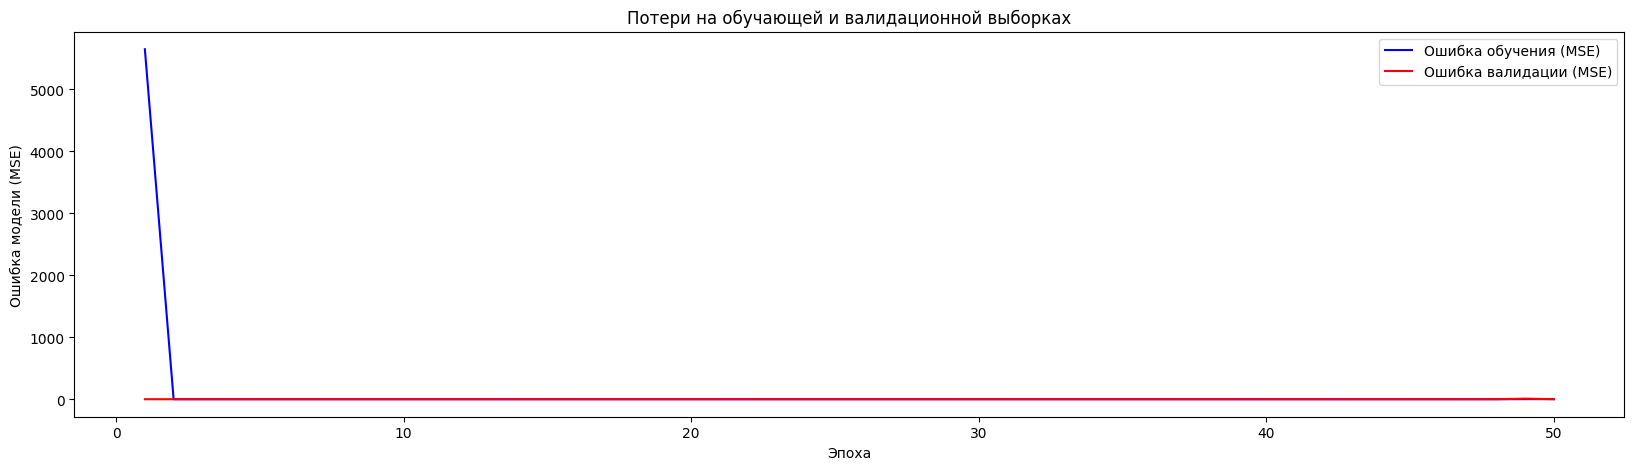

In [274]:
loss_function = regres_model_hist.history['loss']
val_loss_function = regres_model_hist.history['val_loss']

epoch = range(1,epochs+1)

plt.figure(figsize=(20,5))
plt.title('Потери на обучающей и валидационной выборках')
plt.plot(epoch,loss_function,color='blue',label='Ошибка обучения (MSE)')
plt.plot(epoch,val_loss_function,color='red',label='Ошибка валидации (MSE)')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка модели (MSE)')
plt.legend()
plt.show()

### Результаты опытов

In [284]:
num = 1

for mse in mse_results:
    print(f'Опыт №{num}')
    print('MSE:', mse)
    print('RMSE:', np.sqrt(mse))
    print()

    num += 1

Опыт №1
MSE: 18.04182908488608
RMSE: 4.247567431470168

Опыт №2
MSE: 0.3976960101935807
RMSE: 0.6306314376825665

Опыт №3
MSE: 4.847900191283889
RMSE: 2.2017947659316226

Опыт №4
MSE: 0.007603058602850034
RMSE: 0.08719551939664122

Опыт №5
MSE: 0.2557163926162501
RMSE: 0.5056840838075192



# Классификация

In [276]:
# df_cl = pd.read_csv('/content/drive/MyDrive/Ass_learning/data/result_slice (3).csv')
  
# df_cl = df_cl.dropna(axis='columns', how='all', inplace=False)
# df_cl = df_cl.drop('Unnamed: 0', axis=1)

# # df_cl.info()

# df_cl_nan = pd.DataFrame(round((df_cl.isnull().mean() * 100), 2))

# df_cl = df_cl.drop(list(df_cl_nan[df_cl_nan[0] > 40].index), axis=1)
# df_cl

In [277]:
df_cl = df_cl.dropna()

#Перемещаем столбец DEPT в конец таблицы
df_cl = df_cl.reindex(columns=list(df_cl.drop('EF_b', axis=1).append(pd.DataFrame(df_cl['EF_b']))))

NameError: name 'df_cl' is not defined

In [ ]:
# df_cl[]
df_cl['EF_b_BIN'] = (df_cl['EF_b'] > 2).astype('float64')
df_cl

In [ ]:
X = df_cl.drop(['DEPT', 'well', 'FZ', 'EF_b', 'EF_b_BIN'], axis=1)
y = df_cl['EF_b_BIN']

In [ ]:
from sklearn.preprocessing import StandardScaler
stdScaler = StandardScaler()
X = stdScaler.fit_transform(X)
X

In [ ]:
from sklearn.model_selection import train_test_split
X_all_train, X_test, y_all_train, y_test = train_test_split(X, y, test_size=0.15, random_state=15)

X_train, X_val, y_train, y_val = train_test_split(X_all_train, y_all_train, test_size=0.2,random_state=15)

In [ ]:
#'logistic', 'relu', 'tanh'
from sklearn.neural_network import MLPClassifier

batch_size = 200
max_iter = 50

model = MLPClassifier(
    hidden_layer_sizes=(1,2),
    activation='tanh',
    early_stopping=True,
    max_iter= max_iter,
    batch_size  = batch_size
)

hist_cl = model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=y_pred))